<a href="https://colab.research.google.com/github/Susanna-Salata/goit-DS/blob/main/GoIT_DS_HomeWork_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Часть третья: Анализ датасет c Kaggle.com#

### В этой части домашней работы мы еще больше углубимся в библиотеку pandas и рассмотрим более продвинутые функции.

Для этого упражнения мы используем данные по Топ-50 рейтингу самых продаваемых книг на Amazon за 11 лет (с 2009 по 2019). Датасет находится в открытом доступе на Kaggle.com. Загрузите csv файл по ссылке и переместите его в ту же директорию, где находится ваш рабочий ноутбук (для удобства). После этого переходите к заданию


Для выполнения этой части домашнего задания, нужно будет не только написать код, но и ответить на сопутствующие вопросы. Там, где вы увидите выделенную жирным шрифтом надпись ответ:, нужно будет вставить вопрос в файл и ответ на него.

### Прочитайте csv файл (используйте функцию read_csv)

In [123]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/bestsellers with categories.csv')
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


### Выведите первый пять строчек (используется функцию head)

In [32]:
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


### Выведите размеры датасета (используйте атрибут shape)

In [33]:
df.shape

(550, 7)

Для каждой из книг доступно 7 переменных(колонок). Давайте рассмотрим их детальней:

Name - название книги

Author - автор

User Rating - рейтинг (по 5-бальной шкале)

Reviews - количество отзывов

Price - цена (в долларах по состоянию на 2020 год)

Year - год, когда книга попала в рейтинг Топ-50

Genre - жанр

Для упрощения последующей работы, давайте немного подправим названия переменных. Как видите, здесь все названия начинаются с большой буквы, а одно - даже содержит пробел. Это крайне нежелательно и может быть достаточно неудобным. Давайте сменим регистр на маленький, а пробел заменим на нижнее подчеркивания (snake_style). А заодно и выучим полезный атрибут датафрейма: columns (можно просто присвоить список новых имен этому атрибуту)

In [34]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.columns

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')

## Первичное исследование данных#

### Проверьте у всех ли строк хватает данных: выведите количество пропусков (na) в каждом из столбцов (используйте функции isna и sum)

In [35]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Ответ: Есть ли в каких либо переменных пропуски? (Да/**Нет**)

### Проверьте, какие есть уникальные значения в колонке genre (используйте функцию unique)
Ответ: Какие есть уникальные жанры?

In [36]:
df["genre"].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

### Теперь посмотрите на распределение цен: постройте диаграмму (используйте kind='hist')

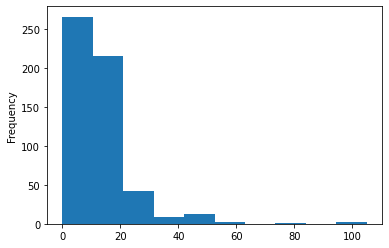

In [37]:
df["price"].plot(kind="hist")

### Определите, какая цена у нас максимальная, минимальная, средняя, медианная (используйте функции max, min, mean, median)


In [38]:
df.agg({"price" : [max, min, np.mean, np.median]})

,price
max,105.0
min,0.0
mean,13.1
median,11.0



Ответ: Mаксимальная цена? = 105$

Ответ: Минимальная цена? = 0$

Ответ: Средняя цена? = 13.1$

Ответ: Медианная цена? = 11.0$

# Поиск и сортировка данных

Ответ: Какой рейтинг в датасете наивысший? Ответ:

In [39]:
df["user_rating"].max()

4.9

Ответ: Сколько книг имеют такой рейтинг? Ответ:

In [40]:
df[(df["user_rating"] == df["user_rating"].max())]["user_rating"].count()

52

Ответ: У какой книги больше всего отзывов? Ответ:

In [44]:
df[df["reviews"] == df["reviews"].max()]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


Ответ: Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая (можно использовать промежуточный датафрейм)? Ответ:

In [48]:
df_2015 = df[df["year"] == 2015]

In [49]:
df_2015[df_2015["price"] == df_2015["price"].max()]

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


Ответ: Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)? Ответ:

In [57]:
df[ (df["genre"]=="Fiction") & (df["year"]==2010) ].shape[0]

20

Ответ: Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin)? Ответ:

In [64]:
df[ (df["user_rating"]==4.9) & ((df["year"]==2010) | (df["year"]==2011)) ]

,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


In [66]:
df[ (df["user_rating"]==4.9) & (df["year"].isin([2010, 2011])) ]

,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


И напоследок, давайте отсортируем по возрастанию цены все книги, которые попали в рейтинг в 2015 году и стоят дешевле 8 долларов (используйте функцию sort_values).

In [71]:
df_2015[df_2015["price"] < 8].sort_values(by="price", ascending=True)

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


Ответ: Какая книга последняя в отсортированном списке? Ответ:

In [75]:
df_2015[df_2015["price"] < 8].sort_values(by="price", ascending=True).iloc[-1]

name           Old School (Diary of a Wimpy Kid #10)
author                                   Jeff Kinney
user_rating                                      4.8
reviews                                         6169
price                                              7
year                                            2015
genre                                        Fiction
Name: 253, dtype: object

# Агрегирование данных и соединения таблиц

Последняя секция этого домашнего задания включает чуть более продвинутые функции. 
Для начала давайте посмотрим на максимальную и минимальную цены для каждого из жанров (используйте функции groupby и agg, для подсчета минимальных и максимальных значений используйте max и min). Не берите все столбцы, виберете только нужные вам

Ответ: Максимальная цена для жанра Fiction: Ответ

Ответ: Минимальная цена для жанра Fiction: Ответ

Ответ: Максимальная цена для жанра Non Fiction: Ответ

Ответ: Минимальная цена для жанра Non Fiction: Ответ

In [83]:
df.groupby("genre").agg({"price" : [max, min]})

price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0

Теперь создайте новый датафрейм, который будет вмещать в себя количество книг для каждого из авторов (используйте функции groupby и agg, для подсчета количества используйте count). Не берите все столбцы, виберете только нужные


In [106]:
df_author = df.groupby("author").agg(count = ("name", len))
df_author

,count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


Ответ: Какой размерности вышла таблица? Ответ:


In [110]:
df_author.shape

(248, 1)

Ответ: У какого автора больше всего книг? Сколько книг у этого автора? Ответ:

In [113]:
df_author[df_author["count"] == df_author["count"].max()]

,count
author,
Jeff Kinney,12


In [118]:
df_author.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, Abraham Verghese to Zhi Gang Sha
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   248 non-null    int64
dtypes: int64(1)
memory usage: 3.9+ KB


Теперь создайте второй датафрейм, который будет вмещать средний рейтинг для каждого автора (используйте функции groupby и agg, для подсчета среднего значения используйте mean). Не берите все столбцы, виберете только нужные


In [108]:
df_author_rating = df.groupby("author").agg( avg_rating = ("user_rating", np.mean))
df_author_rating

,avg_rating
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


Ответ: У какого автора средний рейтинг минимальный? Какой у этого автора средний рейтинг? Ответ:

In [114]:
df_author_rating[df_author_rating["avg_rating"] == df_author_rating["avg_rating"].min()]

,avg_rating
author,
Donna Tartt,3.9


Соедините последние два датафрейма так, чтобы для каждого автора было видно количество книг и средний рейтинг (Используйте функцию concat с параметром axis=1). Сохраните результат в переменную

In [115]:
df_new = pd.concat([df_author, df_author_rating], axis=1)
df_new 

,count,avg_rating
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


Отсортируйте датафрейм по возрастающему количеству книг и возрастающему рейтингу (используйте функцию sort_values)

Ответ: Какой автор первый в списке?

In [117]:
df_new.sort_values(by=["count", "avg_rating"])

,count,avg_rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


In [121]:
df_new.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   author      248 non-null    object 
 1   count       248 non-null    int64  
 2   avg_rating  248 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.9+ KB


# Домашнее задание 3_2

### Визуализируем

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


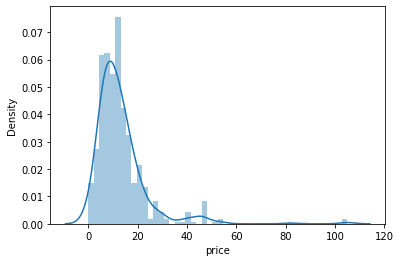

In [129]:
sns.distplot(df["price"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


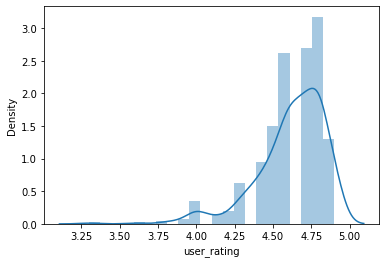

In [127]:
sns.distplot(df["user_rating"])

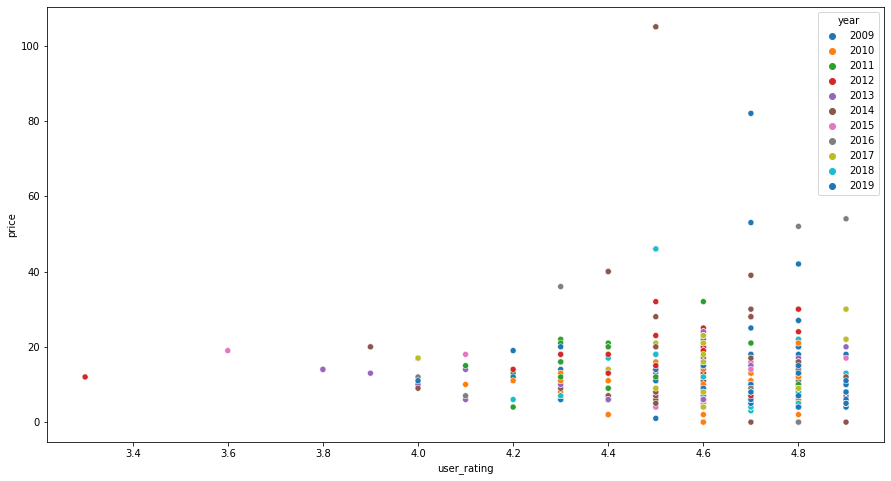

In [137]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x="user_rating", y="price", hue="year", palette="tab10")